In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('Data/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Preprocessing

In [28]:
# Shape of the data
print(df.shape)

(568454, 10)


In [29]:
# Columns in the data
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [30]:
# Check for null values
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [31]:
# Data types
print(df.dtypes)
# More information about the data
print(df.info())
# Summary of the data
print(df.describe())


Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary   

In [32]:
# Remove null values
df.dropna(inplace=True)
# Shape of the data after removing null values
print(df.shape)


(568401, 10)


In [33]:
# Droping irrelevant columns
df.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName'], inplace=True)
print(df.columns)


Index(['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')


In [34]:
# Converting the 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'], unit='s')
print(df.dtypes)


HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                      datetime64[ns]
Summary                           object
Text                              object
dtype: object


In [35]:
# Display the score distribution
print(df['Score'].value_counts())


Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64


In [36]:
# Display the first few values in the 'Summary' column
print(df['Summary'].head())

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object


In [37]:
# Step 5: Label sentiment based on 'Score' (5,4 = positive; 3 = neutral; 1,2 = negative)
df['Sentiment'] = df['Score'].apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')


In [38]:

# Display the first few values in the 'Sentiment' column
print(df['Sentiment'].head())

# Display the sentiment distribution
print(df['Sentiment'].value_counts())

0    positive
1    negative
2    positive
3    negative
4    positive
Name: Sentiment, dtype: object
Sentiment
positive    443756
negative     82007
neutral      42638
Name: count, dtype: int64


In [39]:
#Downsampling the positive reviews and negative reviews to have an equal number of reviews with neutral reviews
negative_reviews = df[df['Sentiment'] == 'negative']
positive_reviews = df[df['Sentiment'] == 'positive']
neutral_reviews = df[df['Sentiment'] == 'neutral']

negative_reviews = negative_reviews.sample(n=len(neutral_reviews), random_state=42)
positive_reviews = positive_reviews.sample(n=len(neutral_reviews), random_state=42)

In [40]:
#Checking the number of reviews in each sentiment
print(negative_reviews.shape)
print(positive_reviews.shape)
print(neutral_reviews.shape)

#Combining the downsampled reviews
df = pd.concat([negative_reviews, positive_reviews, neutral_reviews])

(42638, 7)
(42638, 7)
(42638, 7)


In [41]:
#checking for the sentiment distribution
print(df['Sentiment'].value_counts())


Sentiment
negative    42638
positive    42638
neutral     42638
Name: count, dtype: int64


In [42]:
#checking for the summary distribution
print(df['Summary'].value_counts())



Summary
Disappointed                                 326
Delicious!                                   236
Delicious                                    228
Disappointing                                178
Yummy!                                       154
                                            ... 
Seven Whole Grains                             1
The cookie crumbles                            1
Way too sweet..                                1
Dissapointing...just another diet Big Red      1
Ummm........over hyped???????                  1
Name: count, Length: 84873, dtype: int64


In [43]:
#shuffling the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()


,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,2,3,1,2008-12-24,Yuck!,"These were the sweetest tasting, icky, sticky ...",negative
1,5,6,3,2008-01-07,"Tastes good, but...","This tea tastes good, but it is very finely gr...",neutral
2,16,20,1,2010-04-10,Not worth it!,This is a major disappointment. I found a much...,negative
3,0,0,3,2012-10-06,Aftertaste,I bought the Sodastream after just looking at ...,neutral
4,0,0,2,2012-09-07,"Sticky, and doesn't do the job","Firstly, I must start by saying that I'm a wom...",negative


In [44]:
#Clean text data in 'Text' column
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase the text
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [45]:
# Display the first few values in the 'Cleaned_Text' column
print(df['Cleaned_Text'].head())


0    sweetest tasting icky sticky fruit twisters so...
1    tea tastes good finely ground ends cup like us...
2    major disappointment found much better one els...
3    bought sodastream looking decided try remember...
4    firstly must start saying im woman im pretty a...
Name: Cleaned_Text, dtype: object


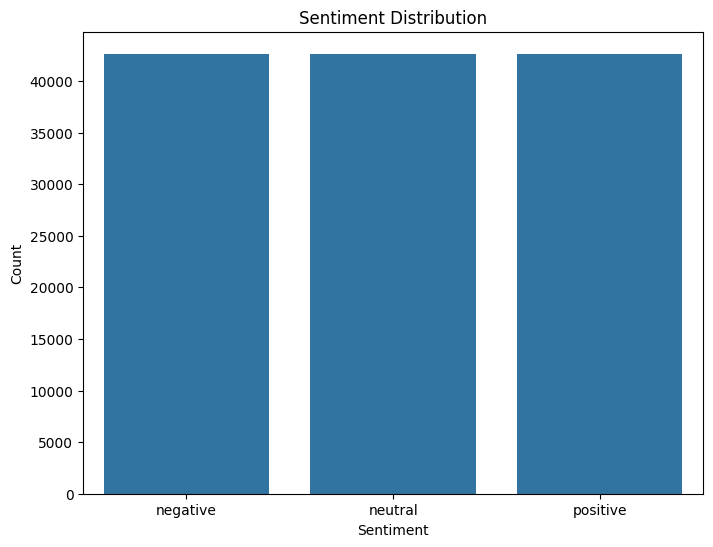

In [46]:
#Visualize the sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

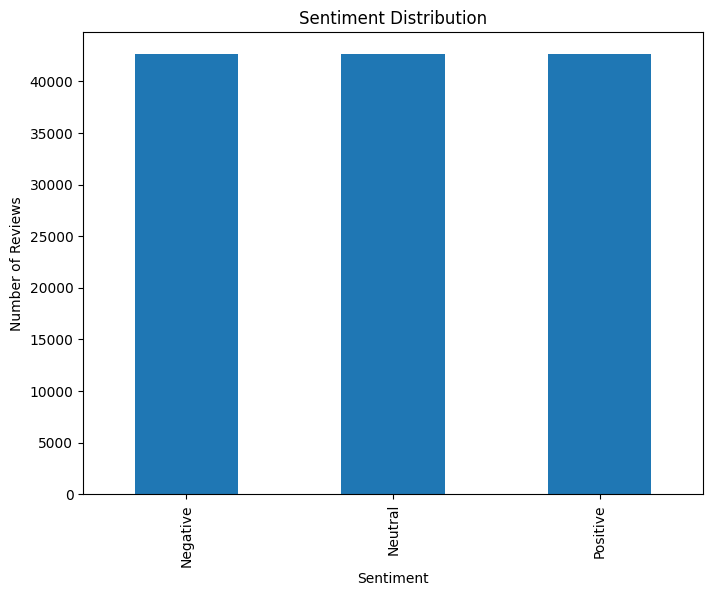

In [47]:

df['Sentiment'] = df['Score'].apply(lambda x: 'Positive' if x > 3 else ('Negative' if x < 3 else 'Neutral'))
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


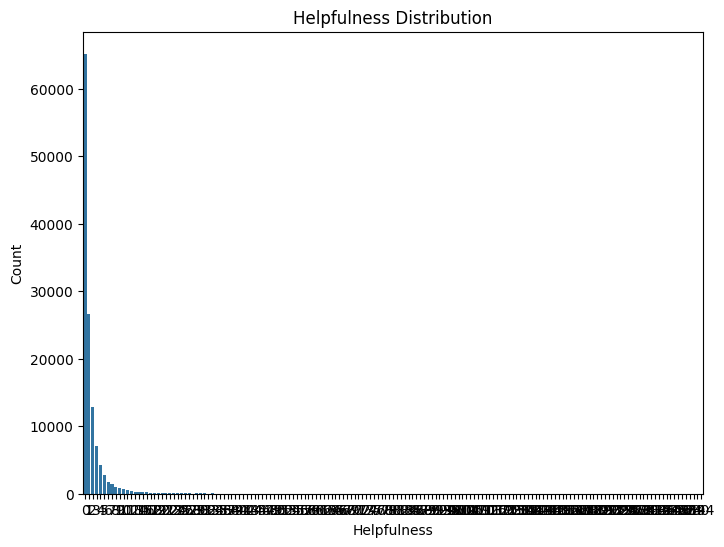

In [48]:
# Visualize the helpfulness distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='HelpfulnessNumerator', data=df)
plt.title('Helpfulness Distribution')
plt.xlabel('Helpfulness')
plt.ylabel('Count')
plt.show()

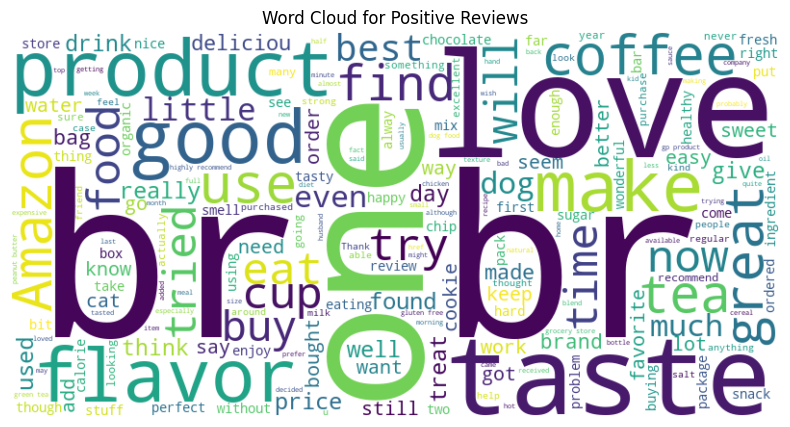

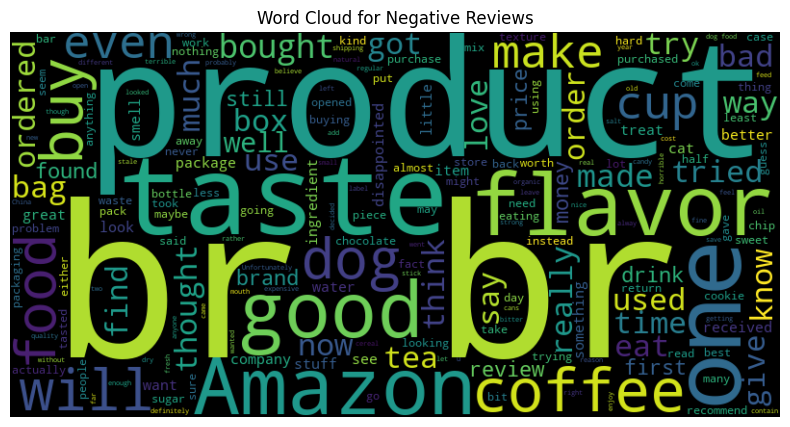

In [49]:
from wordcloud import WordCloud

positive_reviews = df[df['Sentiment'] == 'Positive']['Text'].str.cat(sep=' ')
negative_reviews = df[df['Sentiment'] == 'Negative']['Text'].str.cat(sep=' ')

# Positive Reviews Word Cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Negative Reviews Word Cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()


In [50]:
#pip install wordcloud

In [51]:
# displaying unique values in the helpfulness numerator
print(df['HelpfulnessNumerator'].unique())
# displaying unique values in the helpfulness denominator
print(df['HelpfulnessDenominator'].unique())

[  2   5  16   0   1  31   4  14   3   6   9  13  30   7  15  10   8  19
  21  80  20  11  41  22  24 128  12  23  90  33  71  18  34  54 253  27
 319  32 187  84 123  17 446  25  39 303  48  40  29  36  61  49 121  79
  42  28  69  64  38  73  56  43 143 168  47 100  26  75  94  77  55 116
 844  51  57 119  58  53  70  63  52 110  50 274 141 192 107 109  35 472
  44 147 219  95  45 148 113  68 138 157  85  46 436  60 152  74  72 105
  59  37 491  65 559  86  88 170  83 354 149 112 178 301 151 102 146  62
  89  93  67 142  91 125 135 209  81 189  96 230 117 104 159 281 202 180
  76 247 580  66  78 355  82 346 154 223 144  92 130 262 193  87 524]
[  3   6  20   0   9   1   2  36   4  14  10   7   5  13  31   8  15  16
  11  12  21  26  83  22  17  52  24  18  25 134  38 133  23  27  44  97
  33  19  28  81  53  40  48  41  54 286 323  39 216  87 139 452 307  50
  49  30  47  46  32  42  34  64 125  79  84  74  35  75  56  55 152  43
  51 192  29  66 120  85  72  57 128 923  37  65  70  

In [52]:
# Dropping the rows where the helpfulness denominator is 0
df = df[(df['HelpfulnessDenominator'] > 0)]
# Display the first few values in the 'HelpfulnessNumerator' column
print(df['HelpfulnessNumerator'].head())
# Display the first few values in the 'HelpfulnessDenominator' column
print(df['HelpfulnessDenominator'].head())


0     2
1     5
2    16
5     0
7     1
Name: HelpfulnessNumerator, dtype: int64
0     3
1     6
2    20
5     9
7     1
Name: HelpfulnessDenominator, dtype: int64


In [53]:
# Dropping the rows where helpfulness numerator is 0
df = df[(df['HelpfulnessNumerator'] > 0)]
# Display the first few values in the 'HelpfulnessNumerator' column
print(df['HelpfulnessNumerator'].head())


0     2
1     5
2    16
7     1
8     1
Name: HelpfulnessNumerator, dtype: int64


In [54]:
# creating a new column for the helpfulness ratio
df['Helpfulness_Ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
df['Helpfulness_Ratio'] = df['Helpfulness_Ratio'].clip(upper=1)
# Display the first few values in the 'Helpfulness_Ratio' column
print(df['Helpfulness_Ratio'].head())


0    0.666667
1    0.833333
2    0.800000
7    1.000000
8    1.000000
Name: Helpfulness_Ratio, dtype: float64


In [55]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Cleaned_Text,Helpfulness_Ratio
0,2,3,1,2008-12-24,Yuck!,"These were the sweetest tasting, icky, sticky ...",Negative,sweetest tasting icky sticky fruit twisters so...,0.666667
1,5,6,3,2008-01-07,"Tastes good, but...","This tea tastes good, but it is very finely gr...",Neutral,tea tastes good finely ground ends cup like us...,0.833333
2,16,20,1,2010-04-10,Not worth it!,This is a major disappointment. I found a much...,Negative,major disappointment found much better one els...,0.800000
7,1,1,3,2012-07-14,Not worth the price,Amazon says that I have purchased this before....,Neutral,amazon says purchased sure liked price paid ti...,1.000000
8,1,1,3,2011-11-25,"My dog loves these, I hate them","My dog loves these things, item as advertised....",Neutral,dog loves things item advertised however stink...,1.000000


In [56]:
# combining summary and cleaned text
df['Summary_and_Cleaned_Text'] = df['Summary'] + ' ' + df['Cleaned_Text']
# Display the first few values in the 'Summary_and_Cleaned_Text' column
print(df['Summary_and_Cleaned_Text'].head())


0    Yuck! sweetest tasting icky sticky fruit twist...
1    Tastes good, but... tea tastes good finely gro...
2    Not worth it! major disappointment found much ...
7    Not worth the price amazon says purchased sure...
8    My dog loves these, I hate them dog loves thin...
Name: Summary_and_Cleaned_Text, dtype: object


In [57]:
# confirming the data types
print(df.dtypes)


HelpfulnessNumerator                 int64
HelpfulnessDenominator               int64
Score                                int64
Time                        datetime64[ns]
Summary                             object
Text                                object
Sentiment                           object
Cleaned_Text                        object
Helpfulness_Ratio                  float64
Summary_and_Cleaned_Text            object
dtype: object


In [58]:
# checking the ranger of new feature
print(df['Summary_and_Cleaned_Text'].apply(len).describe())
print(df['Helpfulness_Ratio'].describe())

count    62738.000000
mean       354.273662
std        364.064495
min         27.000000
25%        153.000000
50%        255.000000
75%        426.000000
max      14904.000000
Name: Summary_and_Cleaned_Text, dtype: float64
count    62738.000000
mean         0.793879
std          0.265052
min          0.010989
25%          0.571429
50%          1.000000
75%          1.000000
max          1.000000
Name: Helpfulness_Ratio, dtype: float64


In [59]:
# Text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['Summary_and_Cleaned_Text']).toarray()

print("Shape of X:", X.shape)

Shape of X: (62738, 5000)


In [60]:
# Feature completeness
print("Shape of Sentiment labels:", df['Sentiment'].shape)

Shape of Sentiment labels: (62738,)


In [61]:
# inspecting a sample of the features

print("Sample TF-IDF Features:", tfidf.get_feature_names_out()[:10])


Sample TF-IDF Features: ['10' '100' '12' 'ability' 'able' 'abr' 'absolute' 'absolutely' 'absorb'
 'absorbed']


In [62]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Cleaned_Text,Helpfulness_Ratio,Summary_and_Cleaned_Text
0,2,3,1,2008-12-24,Yuck!,"These were the sweetest tasting, icky, sticky ...",Negative,sweetest tasting icky sticky fruit twisters so...,0.666667,Yuck! sweetest tasting icky sticky fruit twist...
1,5,6,3,2008-01-07,"Tastes good, but...","This tea tastes good, but it is very finely gr...",Neutral,tea tastes good finely ground ends cup like us...,0.833333,"Tastes good, but... tea tastes good finely gro..."
2,16,20,1,2010-04-10,Not worth it!,This is a major disappointment. I found a much...,Negative,major disappointment found much better one els...,0.800000,Not worth it! major disappointment found much ...
7,1,1,3,2012-07-14,Not worth the price,Amazon says that I have purchased this before....,Neutral,amazon says purchased sure liked price paid ti...,1.000000,Not worth the price amazon says purchased sure...
8,1,1,3,2011-11-25,"My dog loves these, I hate them","My dog loves these things, item as advertised....",Neutral,dog loves things item advertised however stink...,1.000000,"My dog loves these, I hate them dog loves thin..."


In [63]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (50190, 5000)
Shape of y_train: (50190,)
Shape of X_test: (12548, 5000)
Shape of y_test: (12548,)


In [64]:
# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7510360216767612
Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.81      0.79      4879
     Neutral       0.66      0.63      0.65      3855
    Positive       0.81      0.80      0.80      3814

    accuracy                           0.75     12548
   macro avg       0.75      0.75      0.75     12548
weighted avg       0.75      0.75      0.75     12548



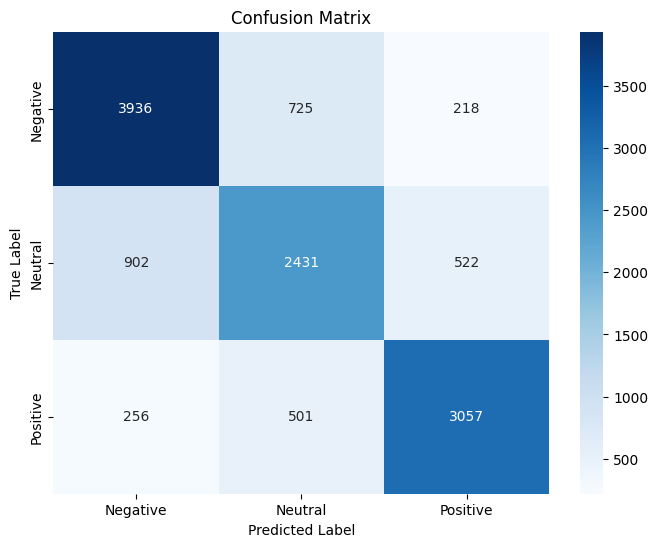

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


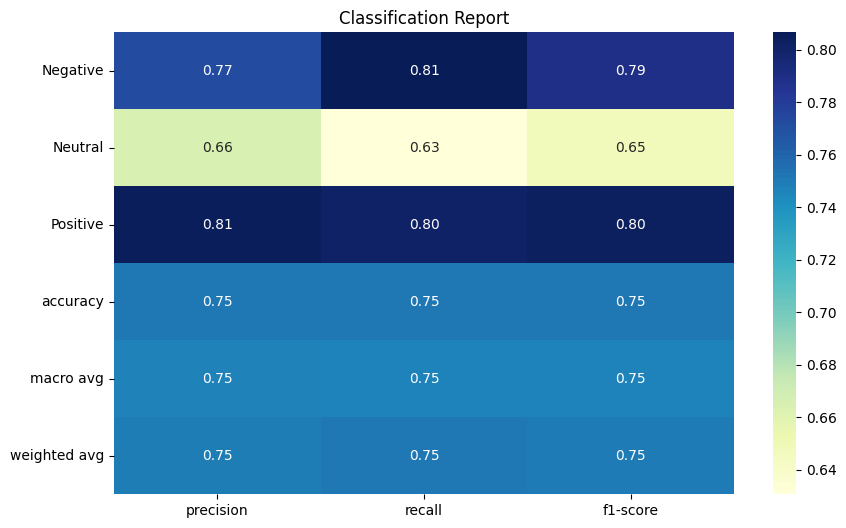

In [66]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame and plot
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Exclude 'accuracy' row for class-specific metrics
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Report')
plt.show()


In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=['negative', 'neutral', 'positive'])
y_pred_binarized = model.decision_function(X_test)

# Plot ROC for each class
plt.figure(figsize=(10, 8))
for i, label in enumerate(['negative', 'neutral', 'positive']):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

plt.figure(figsize=(10, 8))
for i, label in enumerate(['negative', 'neutral', 'positive']):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    plt.plot(recall, precision, label=f'{label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='upper right')
plt.show()
